In [206]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.stats as st

%matplotlib inline

In [207]:
# Gamma
a, p = 4, 2
scale = 1/a
shape = p

# Poisson
lambd = 10

##### 1) (2b) Simulujte jednu trajektorii $\{N_t(\omega) \mid t\in(0,10~\mathrm{s})\}$. Průběh trajektorie graficky znázorněte.

In [208]:
def trajectory(t, steps_per_second = 10):
    n = st.poisson.rvs(mu=lambd*t, size=1)
    print(f'{n=}')
    T = st.uniform.rvs(scale=t, size=n)
    T.sort()
    S = st.gamma.rvs(a=shape, scale=scale, size=n)
    gmean = st.gamma.mean(a=shape, scale=scale)
    print(f'{gmean=}')
    steps = np.arange(0,t,1/steps_per_second)
    N = np.zeros(shape=(len(steps),2))

    for j, s in enumerate(steps):
        cnt = 0
        for t_i, d_i in zip(T,S):
            if t_i <= s and s <= t_i+d_i:
                cnt += 1

        N[j][0] = s
        N[j][1] = cnt
    return N

def rvs(t, steps_per_second=10):
    n = st.poisson.rvs(mu=lambd*t, size=1)
    T = st.uniform.rvs(scale=t, size=n)
    T.sort()
    S = st.gamma.rvs(a=shape, scale=scale, size=n)

    cnt = 0
    s = t - 1/steps_per_second
    for t_i, d_i in zip(T,S):
        if t_i <= s and s <= t_i+d_i:
            cnt += 1
    return cnt

n=array([98])
gmean=0.5


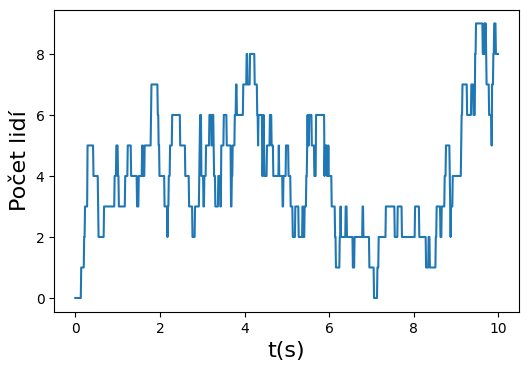

In [209]:
fig, ax = plt.subplots()
fig.set_dpi(100)

x, y = zip(*trajectory(10, 100))
ax.plot(x, y)
ax.set_xlabel('t(s)', size=16)
ax.set_ylabel('Počet lidí', size=16)
fig.savefig('img/traj.png', dpi=300)


##### 2) (2b) Simulujte $n = 500$ nezávislých trajektorií pro $t\in(0,100)$. Na základě těchto simulací odhadněte rozdělení náhodné veličiny $N_{100}$.

In [210]:
n = 500
N_distr = [rvs(t = 100) for _ in range(n)]

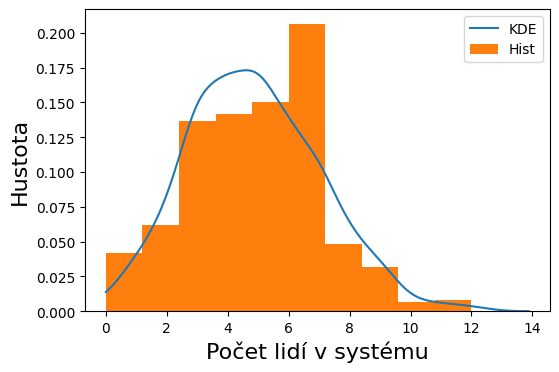

In [204]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_dpi(100)
ax = sns.kdeplot(data=N_distr, clip=(0,None), label='KDE')
ax.hist(N_distr, density=True, label='Hist')
ax.set_ylabel('Hustota', size=16)
ax.set_xlabel('Počet lidí v systému', size=16)
ax.legend()
fig.savefig('img/histkde.png', dpi=300)

##### 3) (2b) Diskutujte, jaké je limitní rozdělení tohoto systému pro $t\to+\infty$ (vizte přednášku 23.). Pomocí vhodného testu otestujte na hladině významnosti 5\%, zda výsledky simulace $N_{100}$ odpovídají tomuto rozdělení.

[(0, 5), (1, 20), (2, 37), (3, 82), (4, 85), (5, 90), (6, 68), (7, 56), (8, 29), (9, 19), (10, 4), (11, 3), (12, 2)]
(5, 20, 37, 82, 85, 90, 68, 56, 29, 19, 4, 3, 2)
[3.3689734995427334, 16.84486749771367, 42.11216874428416, 70.18694790714025, 87.73368488392532, 87.73368488392533, 73.1114040699377, 52.22243147852697, 32.63901967407933, 18.132788707821856, 9.066394353910926, 4.1210883426867815, 1.7171201427861613]
[25, 37, 82, 85, 90, 68, 56, 29, 19, 4, 5]
[20.213840997256394, 42.11216874428416, 70.18694790714025, 87.73368488392532, 87.73368488392533, 73.1114040699377, 52.22243147852697, 32.63901967407933, 18.132788707821856, 9.066394353910926, 6.847634299191458]
Power_divergenceResult(statistic=8.293282723023308, pvalue=0.6002132681793397)
18.307038053275146
10


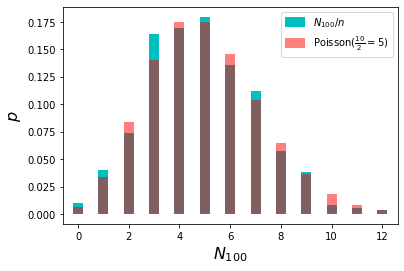

In [205]:
from collections import Counter
c = Counter(N_distr)
c = list(c.items())
c.sort()

print(c)
x, y = zip(*c)

rel_y = [i/sum(y) for i in y]

poisson = [st.poisson.pmf(k,mu=5) for k in range(max(x)+1)]

fig, ax = plt.subplots()

ax.vlines(x, [0] * len(x),rel_y, 'c', alpha = 1, linewidth = 10, label='$N_{100}/n$')
ax.vlines(range(max(x)+1), [0] * (max(x)+1),poisson, 'r', alpha = 0.5, linewidth = 10, label='Poisson($ \\frac{10}{2}=$5)')
ax.set_xlabel('$N_{100}$', size=16)
ax.set_ylabel('$p$',size=16)
ax.legend()
fig.savefig('img/histpoiss.png', dpi=300)

obs = y
exp = [n*p_i for p_i in poisson]

print(obs)
print(exp)

poisson = []
poisson.append(st.poisson.cdf(1,mu=5))
poisson.extend([st.poisson.pmf(k, mu=5) for k in range(2,11)])
poisson.append(st.poisson.sf(10,mu=5))

obs = []
obs.append(sum(y[0:2]))
obs.extend(y[2:11])
obs.append(sum(y[11:]))

exp = [n*p_i for p_i in poisson]

print(obs)
print(exp)

print(st.chisquare(obs, exp))
print(st.chi2.ppf(1-0.05, df=len(obs)-1))
print(len(obs)-1)



